# Ignore Warnings

In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Import Libraries


In [2]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from collections import Counter
from utils.textnormalization import Text_Normalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.text_preprocessing import data_words, words_to_index_, index_to_word_, word_counts, text_to_sequence, sequences_padding, one_hot_encoding
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import generate_poitive_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
from utils.transformers_ import sentiment_analysis_transformers
from utils.model_inference import machine_learning_inference, deep_learning_inference
from utils.word_vector import word_vector_
tokenizer_ = RegexpTokenizer(r'\w+')
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

# Read Data

In [4]:
Corpus = pd.read_csv('movie_data.csv')
Corpus.rename(columns={'review': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({0:'Negative', 1: 'Positive'})
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus = Corpus.sample(frac=1, random_state=44, ignore_index=True)
Corpus.index = Corpus.index + 1
Corpus.tail(10)

,Review,Sentiment
49960,"The main character, Pharaon, has suffered a lo...",Negative
49961,"I know little or nothing about astronomy, but ...",Positive
49962,"A few years ago, a friend got from one of his ...",Positive
49963,When I first saw this show i thought to my sel...,Negative
49964,"Reading the other user comments, the review by...",Negative
49965,I loved Dewaere in Series Noir. His talent is ...,Negative
49966,well after watching this i can say that it ain...,Negative
49967,Yet another movie with an interesting premise ...,Negative
49968,I am so upset that ABC is giving up on yet ano...,Positive
49969,"I love this movie, but can't get what is in th...",Positive


# Dealing With Duplicates Data

In [5]:
Corpus.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [6]:
Corpus.drop_duplicates(inplace=True, ignore_index=True)

# Validation Data

In [7]:
reviews = [
    "The movie was fantastic! I really loved the story and the acting was great.",
    "The film was boring and too long. I almost fell asleep.",
    "What a waste of time, terrible plot and awful characters!",
    "An absolute masterpiece, visually stunning and emotionally touching.",
    "The direction was poor, and the plot was hard to follow.",
    "I enjoyed every minute of the movie, especially the special effects!",
    "The movie had a slow start but picked up towards the middle and ended strong.",
    "I wouldn’t recommend this film, the dialogue was cheesy and predictable.",
    "The acting was top-notch, and the story was deeply moving.",
    "The film was just okay, not as great as I expected it to be.",
    "It was one of the best films I've seen this year! Highly recommend.",
    "The soundtrack was fantastic, but the storyline was confusing and hard to follow."
]

# Sentiment Information

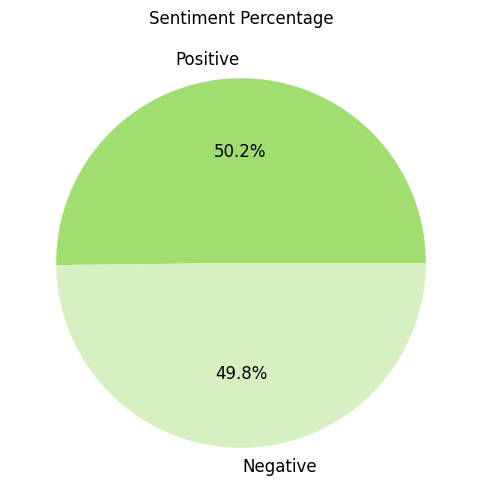

In [8]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

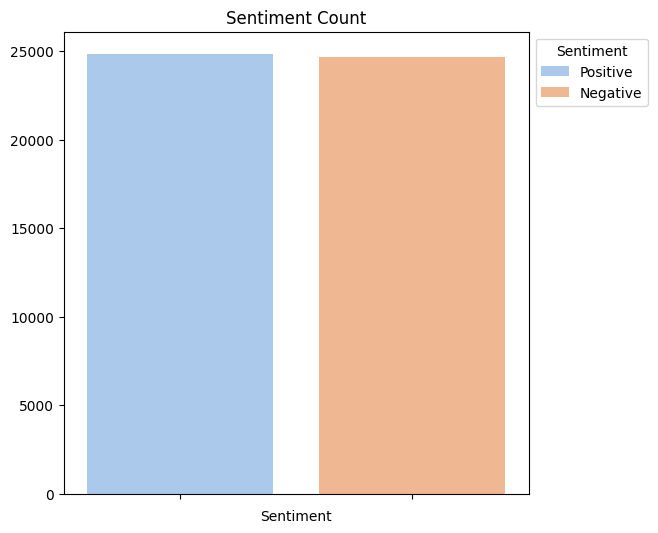

In [9]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [10]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

532210

# Average Number Of Sentences

In [11]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [12]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [13]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [14]:
Corpus["Number of Words 1"] = Corpus['Review'].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus["Number of Words 1"].sum()

11880490

# Average Number Of Words Before Text Normalization

In [15]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

240

# Maximum Number Of Word Before Text Normalization

In [16]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

2525

# Minimum Number Of Words Before Text Normalization

In [17]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

6

In [18]:
Corpus[Corpus["Number of Words 1"] == 0]

,Review,Sentiment,NumberOfSentences,Number of Words 1


# Number Of Charachters Before Text Normalization

In [19]:
Corpus["Number of Charachters 1"] = Corpus['Review'].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 1"].sum()

50732106

# Average Number Of Charachters Before Text Normalization

In [20]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

1024

# Maximum Number Of Charachters Before Text Normalization

In [21]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

10862

# Minimum Number Of Charachters Before Text Normalization

In [22]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

25

In [23]:
Corpus[Corpus['Number of Charachters 1']==0]

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1


# Most Frequent Words Before Text Normalization

In [24]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

,Word,Count
1,the,563758
2,a,304522
3,and,299426
4,of,281270
5,to,259623
6,is,201458
7,in,168540
8,I,131272
9,that,125778
10,this,112739


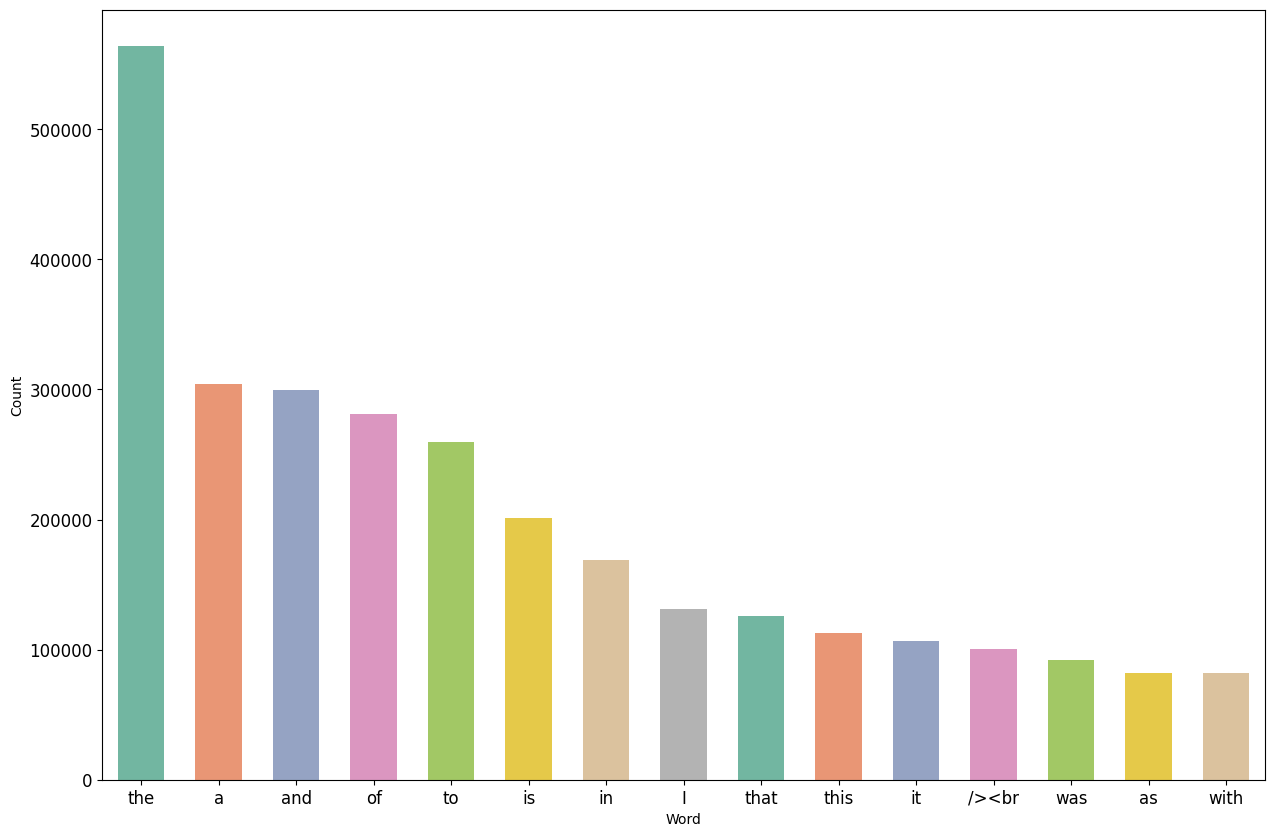

In [25]:
bar_plot(data=MostFrequentWordDF1,  x = 'Word', y='Count')

# Text Normalization

In [26]:
text_normalization = Text_Normalization(string_lower = True,
                                        remove_emojis = True,
                                        remove_hashtags = True,
                                        remove_emails = True,
                                        remove_url = True,
                                        remove_mention = True,
                                        remove_html_tags = True,
                                        remove_new_line_char = True,
                                        remove_duplicate_word = True,
                                        remove_single_letter = True,
                                        remove_duplicated_letter = True,
                                        expand_contractions = True,
                                        remove_stop_words = True,
                                        remove_unicode_and_special_character = True,
                                        remove_latin_letter = True,
                                        remove_punctuations = True,
                                        remove_number = True,
                                        remove_longest_than = True,
                                        remove_extra_whitespace = True)


In [27]:
Corpus['Normalized_Review'] = Corpus['Review'].map(lambda x: text_normalization.text_normalization(x))
Corpus.dropna(axis=1, inplace=True)
Corpus.to_csv('Normalized Corpus.csv')
Corpus.head()

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1,Normalized_Review
0,"This is a ravishing, yet spare adaption of Tho...",Positive,4,107,515,ravishing spare adaption thomas mann novelette...
1,Something to Sing About was produced at Grand ...,Negative,21,396,1740,sing produced grand national studios james cag...
2,My son Adam (5 years old) is a big Scooby Doo ...,Positive,6,132,521,son adam years old big scooby doo fan like fil...
3,"From the title, the tag-line, the plot summary...",Negative,10,289,1296,title tag line plot summary dvd expected sligh...
4,Think of this film as a Saturday morning live-...,Negative,7,115,502,think film morning live action program ages ag...


# Number Of Unique Words

In [28]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

98797

# WordCloud

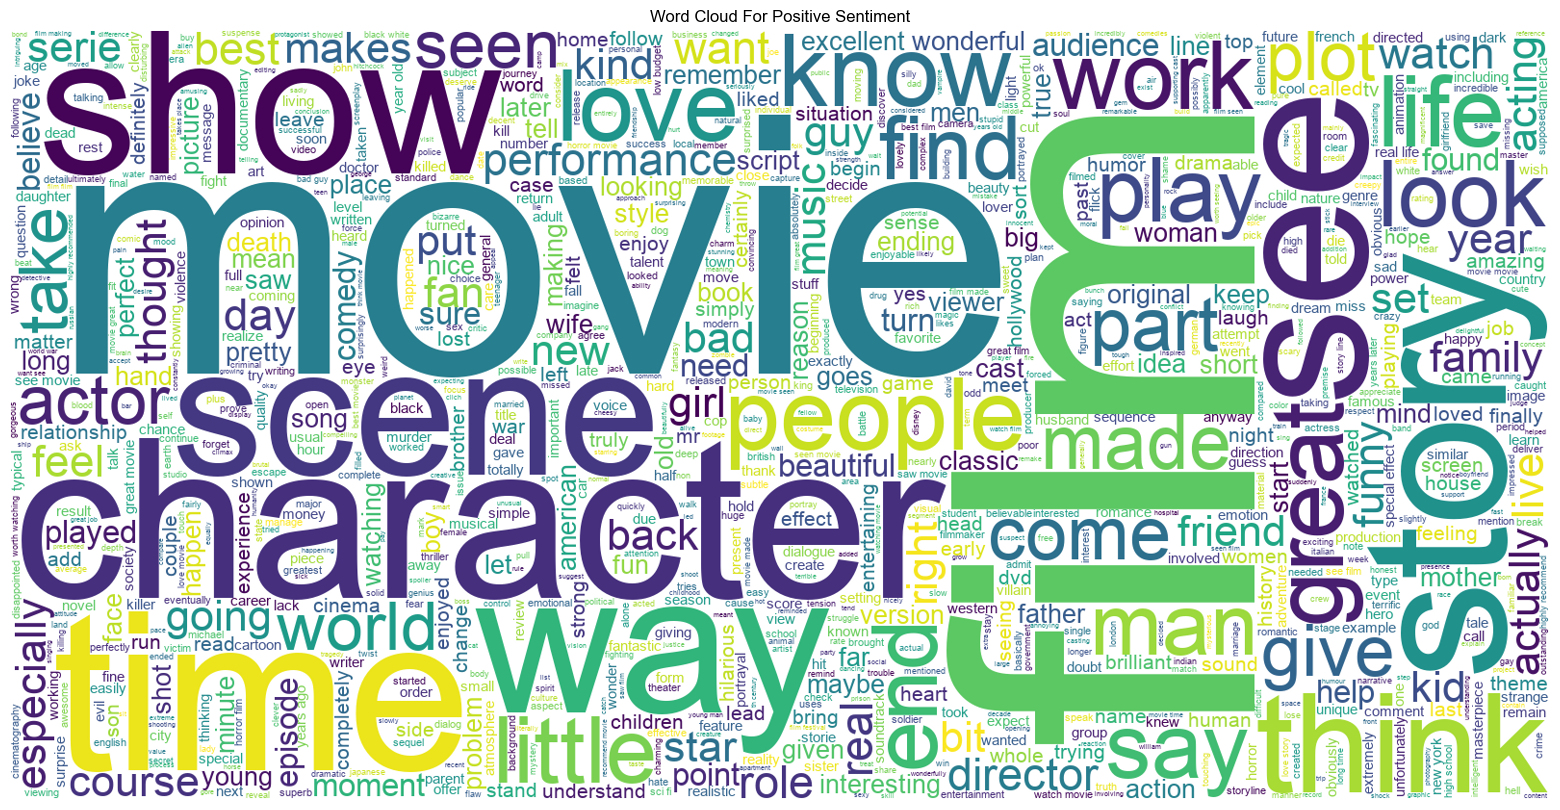

In [29]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

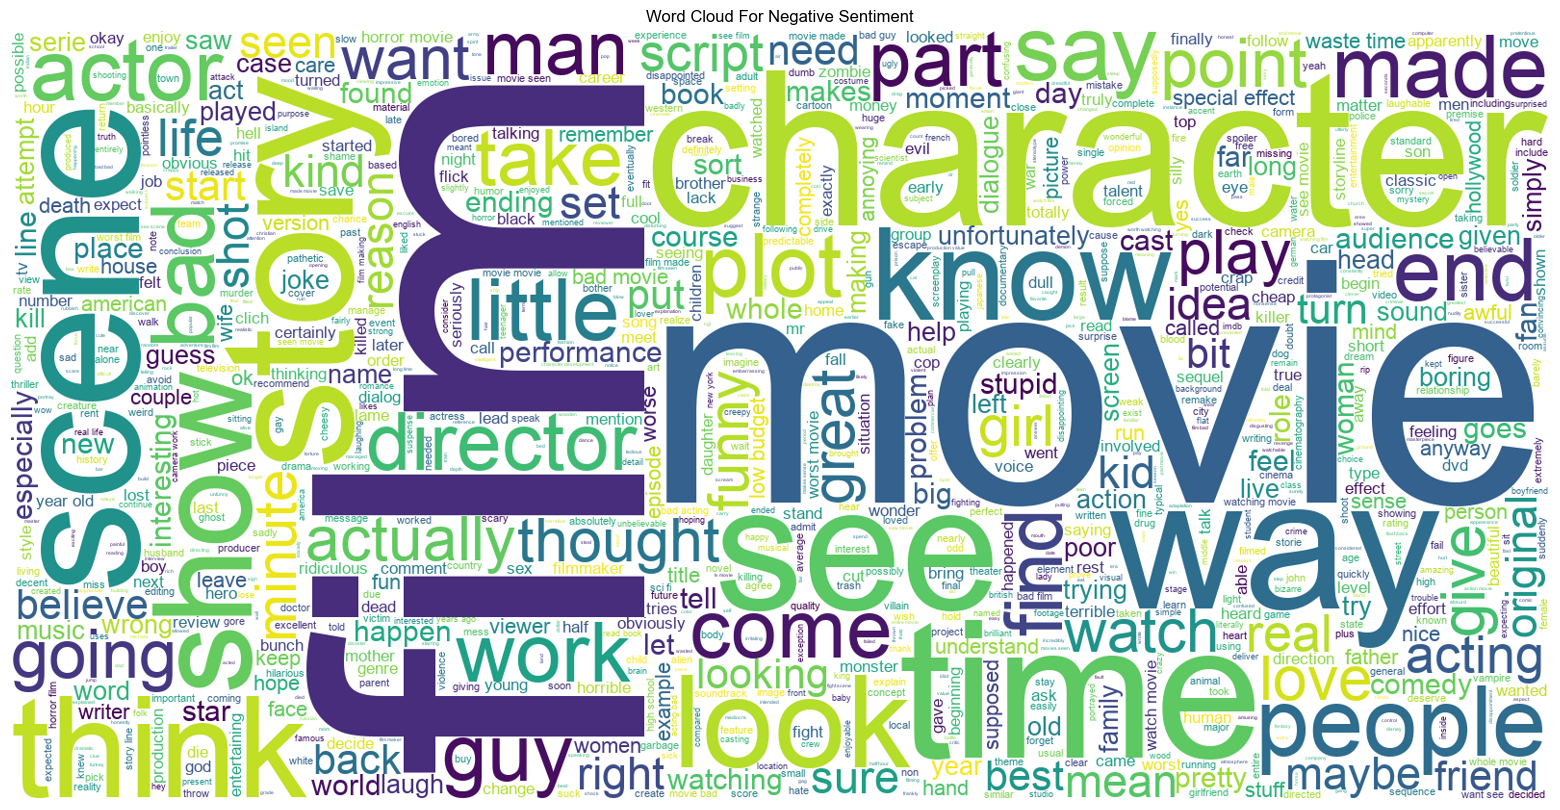

In [30]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [31]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

5015897

# Average Number Of Words After Text Normalization

In [32]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

101

# Maximum Number Of Word After Text Normalization

In [33]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

1271

# Minimum Number Of Words After Text Normalization

In [34]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [35]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 2"].sum()

30323242

# Average Number Of Charachters After Text Normalization

In [36]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

612

# Maximum Number Of Charachters After Text Normalization

In [37]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

7135

# Minimum Number Of Charachters After Text Normalization

In [38]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

2

# Most Frequent Words After Text Normalization

In [39]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

,Word,Count
1,movie,87146
2,film,78987
3,like,39755
4,time,24836
5,story,22942
6,see,22772
7,bad,18219
8,people,17990
9,great,17982
10,made,15974


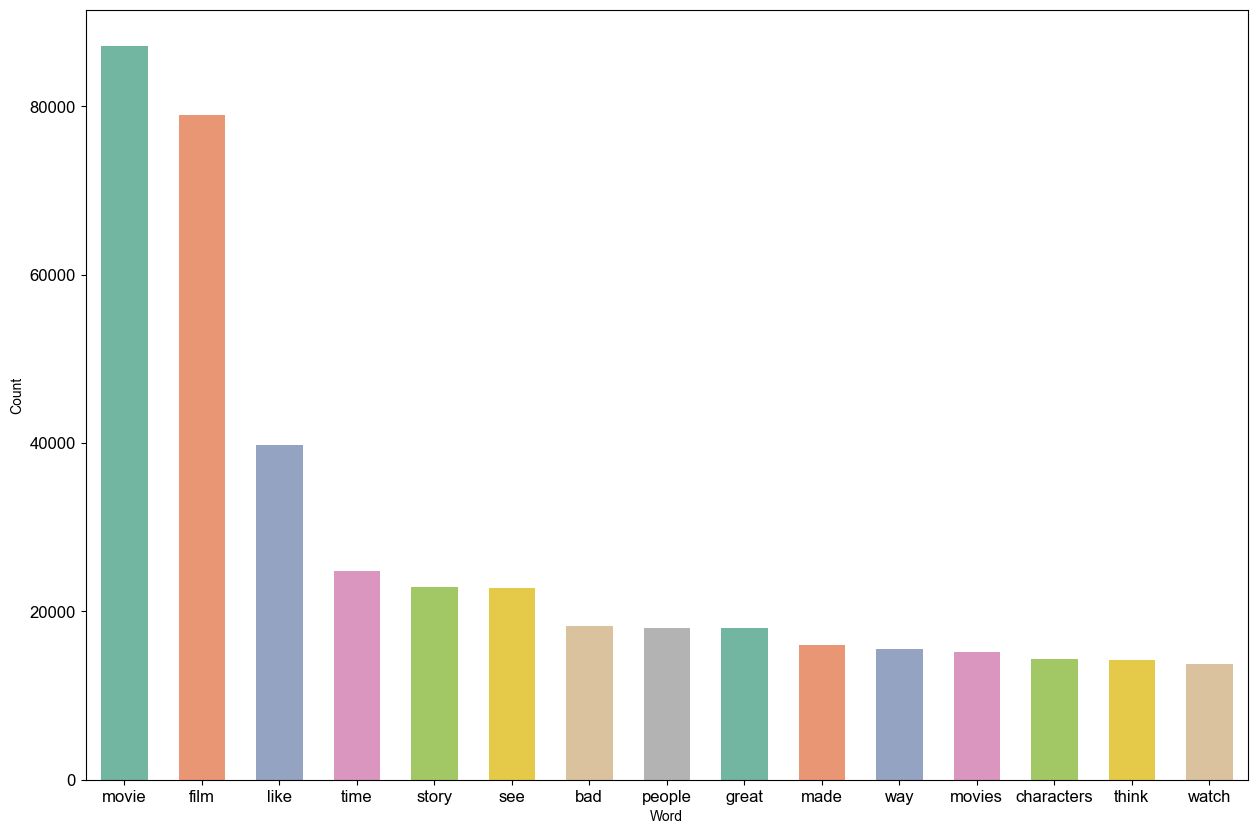

In [40]:
bar_plot(data=MostFrequentWordDF2, x = 'Word', y='Count')

# Most Frequent Words Of Each Sentiment

**1-Positive**

In [41]:
Positive = Corpus[Corpus['Sentiment'] == 'Positive']

In [42]:
PositiveMostFrequentWord = Counter((Positive['Normalized_Review']).str.split().explode()).most_common(10)
PositiveMostFrequentWordDF = pd.DataFrame(PositiveMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
PositiveMostFrequentWordDF

,Word,Count
1,film,41885
2,movie,37602
3,like,17604
4,story,12880
5,great,12860
6,time,12664
7,see,12196
8,people,8673
9,love,8632
10,best,8462


**2-Negative**

In [43]:
Negative = Corpus[Corpus['Sentiment'] == 'Negative']

In [44]:
NegativeMostFrequentWord = Counter((Negative['Normalized_Review']).str.split().explode()).most_common(10)
NegativeMostFrequentWordDF = pd.DataFrame(NegativeMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NegativeMostFrequentWordDF

,Word,Count
1,movie,49544
2,film,37102
3,like,22151
4,bad,14499
5,time,12172
6,see,10576
7,story,10062
8,people,9317
9,made,8699
10,movies,8236


# Part Of Speech Tagging (POS)

In [45]:
word_ = list(UniqueWords)
pos = nltk.pos_tag(word_)
word = []
tag = []

In [46]:
for i in pos:
    word.append(i[0])
    tag.append(i[1])

In [47]:
pos = pd.DataFrame(zip(word, tag), columns=['Word', 'Tag'])
pos.tail()

,Word,Tag
98792,lumage,NN
98793,disciplines,NNS
98794,arsonist,VBP
98795,sextet,JJ
98796,boon,NN


In [48]:
pos['Tag'].value_counts()

Tag
NN      37547
JJ      20014
NNS     13205
VBP      7741
VBG      4993
VBD      4406
RB       4400
VBZ      1994
VBN      1461
IN        693
VB        455
JJR       396
JJS       382
NNP       339
FW        336
RBR       202
CC         43
CD         38
PRP        32
RP         30
MD         19
WP         15
DT         14
RBS        14
WRB        10
WDT         8
PRP$        5
EX          2
UH          1
POS         1
TO          1
Name: count, dtype: int64

# Bigrams

In [49]:
Corpus['Bigrams'] = Corpus['Normalized_Review'].apply(lambda x: list(nltk.bigrams(x.split( ))))
Corpus

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1,Normalized_Review,Number of Words 2,Number of Charachters 2,Bigrams
0,"This is a ravishing, yet spare adaption of Tho...",Positive,4,107,515,ravishing spare adaption thomas mann novelette...,54,372,"[(ravishing, spare), (spare, adaption), (adapt..."
1,Something to Sing About was produced at Grand ...,Negative,21,396,1740,sing produced grand national studios james cag...,176,1050,"[(sing, produced), (produced, grand), (grand, ..."
2,My son Adam (5 years old) is a big Scooby Doo ...,Positive,6,132,521,son adam years old big scooby doo fan like fil...,56,283,"[(son, adam), (adam, years), (years, old), (ol..."
3,"From the title, the tag-line, the plot summary...",Negative,10,289,1296,title tag line plot summary dvd expected sligh...,122,752,"[(title, tag), (tag, line), (line, plot), (plo..."
4,Think of this film as a Saturday morning live-...,Negative,7,115,502,think film morning live action program ages ag...,50,286,"[(think, film), (film, morning), (morning, liv..."
...,...,...,...,...,...,...,...,...,...
49546,I loved Dewaere in Series Noir. His talent is ...,Negative,9,152,696,loved dewaere series noir talent trivialized w...,79,497,"[(loved, dewaere), (dewaere, series), (series,..."
49547,well after watching this i can say that it ain...,Negative,1,179,759,watching say worst movie made yes folks worse ...,83,469,"[(watching, say), (say, worst), (worst, movie)..."
49548,Yet another movie with an interesting premise ...,Negative,5,133,560,movie interesting premise wondrous special eff...,54,325,"[(movie, interesting), (interesting, premise),..."
49549,I am so upset that ABC is giving up on yet ano...,Positive,22,264,1061,upset abc giving show chance real winner show ...,106,587,"[(upset, abc), (abc, giving), (giving, show), ..."


# Split The Dataset Into Dependent (X) And Independent (y)

In [50]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [51]:
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,  stratify=y)

# Vectorizer

In [53]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Mapping

In [54]:
Word_mapping = Vectorizer.vocabulary_
Word_mapping_ =pd.DataFrame((list(Word_mapping.items())), columns=['Word', 'Mapping'])
Word_mapping_.head()

,Word,Mapping
0,insult,39758
1,sa,67890
2,film,28414
3,industry,39107
4,seen,69938


# Machine Learning

**1-Naive Bayes**

In [55]:
Algorithm = MultinomialNB(alpha= 1)
model_1 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_1, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

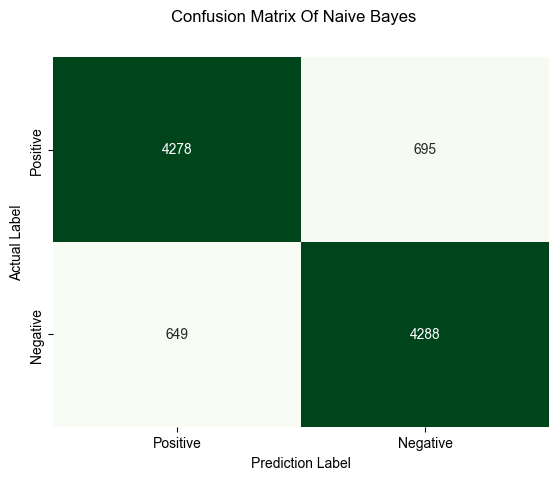

In [56]:
y_predNB = model_1.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusion_matrix = ConfusionMatrixNB, name = 'Naive Bayes')
False_PositiveNB, True_PositiveNB, False_NegativeNB, True_NegativeNB = generate_poitive_negative(ConfusionMatrixNB)

In [57]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [58]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

,Values
Accuracy,0.864379
Precision,0.860245
Sensitivity,0.868277
Specificity,0.860526
F1Score,0.864242
Error,0.135621


**2-Logistic Regression**

In [59]:
Algorithm = LogisticRegression()
model_2 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_2, X_train=X_train_Vec, y_train=y_train)

LogisticRegression()

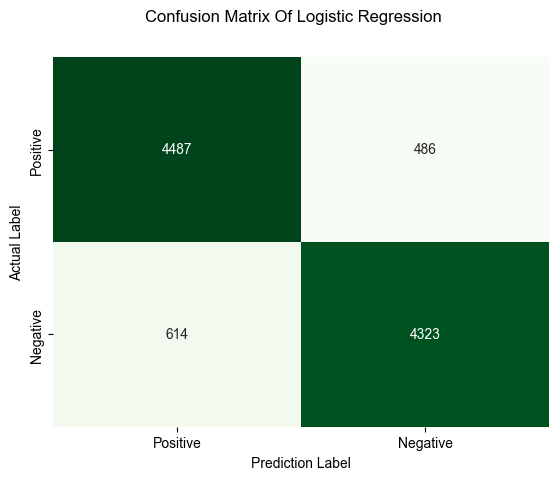

In [60]:
y_predLR = model_2.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusion_matrix = ConfusionMatrixLR, name = 'Logistic Regression')
False_PositiveLR, True_PositiveLR, False_NegativeLR, True_NegativeLR = generate_poitive_negative(ConfusionMatrixLR)

In [61]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [62]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

,Values
Accuracy,0.889001
Precision,0.902272
Sensitivity,0.879631
Specificity,0.898939
F1Score,0.890808
Error,0.110999


**3-Decision Tree**

In [63]:
Algorithm = DecisionTreeClassifier(criterion='gini', )
model_3 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_3, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

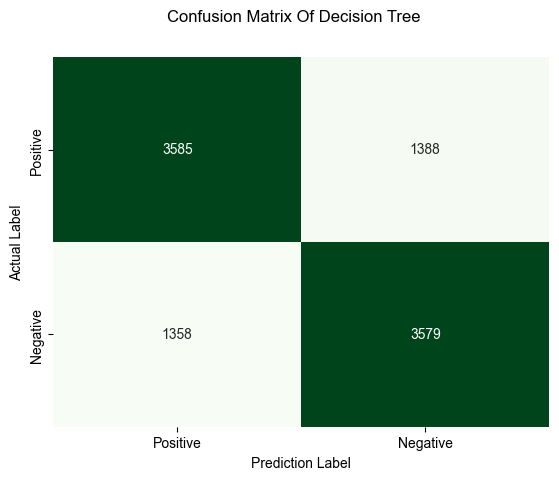

In [64]:
y_predDT = model_3.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusion_matrix = ConfusionMatrixDT, name = 'Decision Tree')
False_PositiveDT, True_PositiveDT, False_NegativeDT, True_NegativeDT = generate_poitive_negative(ConfusionMatrixDT)

In [65]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [66]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

,Values
Accuracy,0.722906
Precision,0.720893
Sensitivity,0.725268
Specificity,0.720556
F1Score,0.723074
Error,0.277094


**4-K Nearest Neighbors**

In [67]:
Algorithm =KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance', p=2)
model_4 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_4, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(weights='distance')

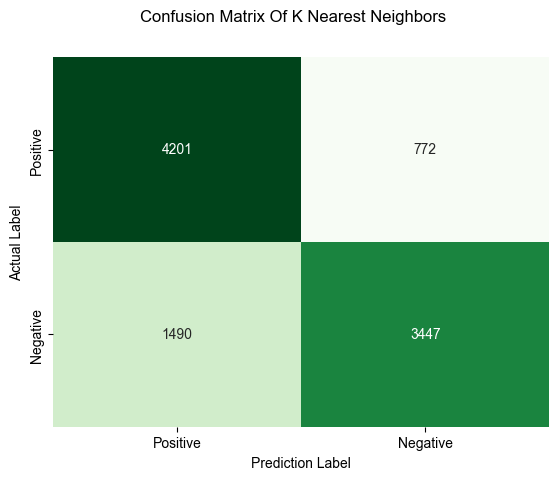

In [68]:
y_predKNN = model_4.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusion_matrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')
False_PositiveKNN, True_PositiveKNN, False_NegativeKNN, True_NegativeKNN = generate_poitive_negative(ConfusionMatrixKNN)

In [69]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [70]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

,Values
Accuracy,0.771746
Precision,0.844762
Sensitivity,0.738183
Specificity,0.817018
F1Score,0.787884
Error,0.228254


**5-Random Forest**

In [71]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100, )
model_5 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_5, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

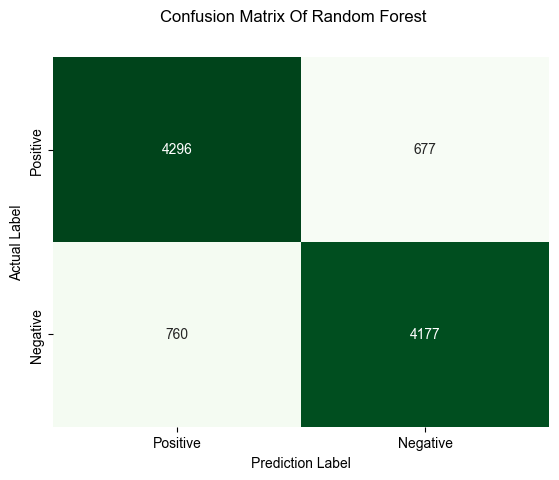

In [72]:
y_predRF = model_5.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusion_matrix = ConfusionMatrixRF, name = 'Random Forest')
False_PositiveRF, True_PositiveRF, False_NegativeRF, True_NegativeRF = generate_poitive_negative(ConfusionMatrixRF)

In [73]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [74]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

,Values
Accuracy,0.854995
Precision,0.863865
Sensitivity,0.849684
Specificity,0.860527
F1Score,0.856716
Error,0.145005


**6-SGD Classifier**

In [75]:
Algorithm = SGDClassifier(loss='hinge', )
model_6 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_6, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

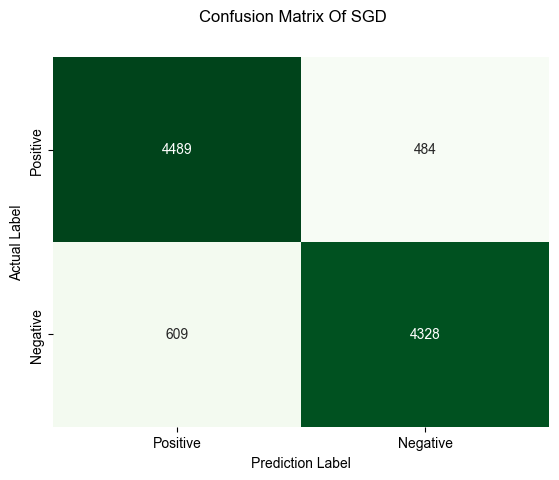

In [76]:
y_predSGD = model_6.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusion_matrix = ConfusionMatrixSGD, name = 'SGD')
False_PositiveSGD, True_PositiveSGD, False_NegativeSGD, True_NegativeSGD = generate_poitive_negative(ConfusionMatrixSGD)

In [77]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [78]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

,Values
Accuracy,0.889707
Precision,0.902674
Sensitivity,0.880541
Specificity,0.899418
F1Score,0.891471
Error,0.110293


# Deep Learning

**1-Word To Integer**

In [79]:
all_words , words = data_words(data=(X_train.to_list())) # Set With Unique Words And Find Number Of Unique Words
words_to_index = words_to_index_(words=words) # Convert Word To Integer Index
index_to_words = index_to_word_(words=words)
all_words

89901

**2-Data To Sequence**

In [80]:
X_train_sequences = text_to_sequence(word_index=words_to_index, data=X_train) # Convert Text Into Squences Of Integer
X_test_sequences = text_to_sequence(word_index=words_to_index, data=X_test) # Convert Text Into Squences Of Integer
max_length = len(max(X_train_sequences, key = len)) # Find Max Length

**3-Zero Padding**

In [81]:
encoded_X_train = sequences_padding(input_sequence=X_train_sequences, max_length=max_length, padding='pre')# Zero Padding (Add Zeros To Start Of Sequence In Input Sequences To Make All Sequences In Same Length)
encoded_X_test = sequences_padding(input_sequence=X_test_sequences, max_length=max_length, padding='pre') # Zero Padding (Add Zeros To Start Of Sequence In Input Sequences To Make All Sequences In Same Length)

In [82]:
print('The Vocab Size Is :', all_words)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 89901

The Max Length Is : 1271


**4.Word Index**

In [83]:
Word_Index_ =pd.DataFrame(words_to_index.values(),  index = words_to_index.keys(), columns=['Index'])  
Word_Index_.head(10)

,Index
UNK,1
transition,2
yuks,3
ranges,4
peice,5
elizabethan,6
primes,7
mcculloch,8
ones,9
ladislaw,10


**5-Word Occurrence**

In [84]:
word_count = word_counts(data=(X_train.to_list() + X_test.to_list())) # Number Of Occurrence Each Word
word_count_ =pd.DataFrame((list(word_count.items())), columns=['Word', 'Count'])
word_count_.head()

,Word,Count
0,movie,87146
1,film,78987
2,like,39755
3,time,24836
4,story,22942


**6-Word Vector**

In [85]:
path = 'glove.twitter.27B.100d.txt'
embedding_dim, word_vector = word_vector_(path, all_words, words_to_index)

# Deep Learing Models

**7-LSTM**

I0000 00:00:1746471234.181996 2299920 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746471234.182406 2299920 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 322s 257ms/step - accuracy: 0.7107 - loss: 0.5430 - val_accuracy: 0.8350 - val_loss: 0.3811 - learning_rate: 1.0000e-04
Epoch 2/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 321s 259ms/step - accuracy: 0.8435 - loss: 0.3604 - val_accuracy: 0.8518 - val_loss: 0.3484 - learning_rate: 1.0000e-04
Epoch 3/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 302s 244ms/step - accuracy: 0.8756 - loss: 0.3041 - val_accuracy: 0.8645 - val_loss: 0.3262 - learning_rate: 1.0000e-04
Epoch 4/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 300s 242ms/step - accuracy: 0.8954 - loss: 0.2642 - val_accuracy: 0.8733 - val_loss: 0.3116 - learning_rate: 1.0000e-04
Epoch 5/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 300s 242ms/step - accuracy: 0.9121 - loss: 0.2319 - val_accuracy: 0.8749 - val_loss: 0.3038 - learning_rate: 1.0000e-04
Epoch 6/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 298s 240ms/step - accuracy: 0.9253 - loss: 0.2035 - val_accuracy: 0.8713 - val_loss: 0.3160 - learning_rate: 1.0000e-04
Epoch 7/20
1239/1239 ━━━━━━━

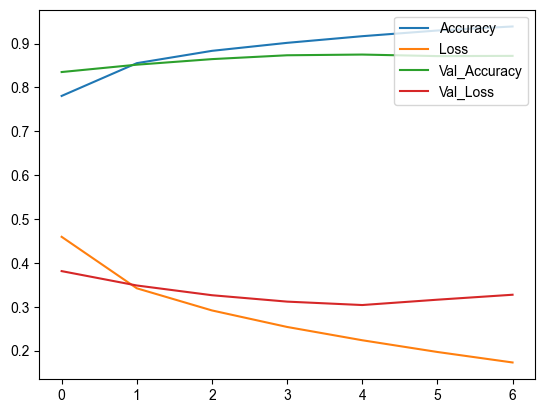

In [86]:
model_7 =lstm_(vocab_size = all_words , embedding_dim = embedding_dim, max_length=max_length, units = 128, embeddings_matrix=word_vector)
model_compile(model=model_7)
history = model_fit(model=model_7, X_train=encoded_X_train, y_train=y_train, X_test = encoded_X_test, y_test= y_test, epochs=20, batch_size=32)
plot_changes(histoty=history)       

**8-Bidirectional LSTM**

Epoch 1/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 432s 347ms/step - accuracy: 0.6470 - loss: 0.6249 - val_accuracy: 0.8196 - val_loss: 0.4050 - learning_rate: 1.0000e-04
Epoch 2/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 460s 371ms/step - accuracy: 0.8326 - loss: 0.3838 - val_accuracy: 0.8501 - val_loss: 0.3533 - learning_rate: 1.0000e-04
Epoch 3/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 425s 343ms/step - accuracy: 0.8656 - loss: 0.3231 - val_accuracy: 0.8512 - val_loss: 0.3547 - learning_rate: 1.0000e-04
Epoch 4/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 433s 350ms/step - accuracy: 0.8637 - loss: 0.3299 - val_accuracy: 0.8050 - val_loss: 0.4455 - learning_rate: 1.0000e-04


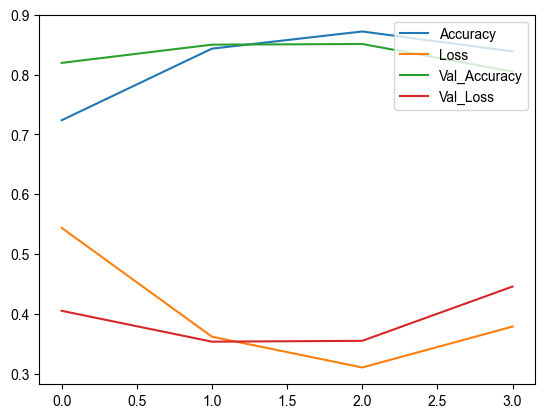

In [87]:
model_8 = bidirectional_lstm(vocab_size =all_words, embedding_dim = embedding_dim, max_length=max_length, units = 128, embeddings_matrix=word_vector)
model_compile(model=model_8)
history = model_fit(model=model_8, X_train=encoded_X_train, y_train=y_train, X_test= encoded_X_test, y_test=y_test, epochs=20, batch_size=32)
plot_changes(histoty=history)

**9-GRU**

Epoch 1/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 220s 176ms/step - accuracy: 0.6163 - loss: 0.6372 - val_accuracy: 0.8233 - val_loss: 0.4101 - learning_rate: 1.0000e-04
Epoch 2/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 266s 214ms/step - accuracy: 0.8286 - loss: 0.3840 - val_accuracy: 0.8493 - val_loss: 0.3569 - learning_rate: 1.0000e-04
Epoch 3/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 259s 209ms/step - accuracy: 0.8681 - loss: 0.3140 - val_accuracy: 0.8601 - val_loss: 0.3321 - learning_rate: 1.0000e-04
Epoch 4/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 255s 206ms/step - accuracy: 0.8925 - loss: 0.2677 - val_accuracy: 0.8688 - val_loss: 0.3164 - learning_rate: 1.0000e-04
Epoch 5/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 251s 203ms/step - accuracy: 0.9108 - loss: 0.2307 - val_accuracy: 0.8732 - val_loss: 0.3120 - learning_rate: 1.0000e-04
Epoch 6/20
1239/1239 ━━━━━━━━━━━━━━━━━━━━ 256s 206ms/step - accuracy: 0.9270 - loss: 0.1991 - val_accuracy: 0.8749 - val_loss: 0.3172 - learning_rate: 1.0000e-04
Epoch 7/20
1239/1239 ━━━━━━━

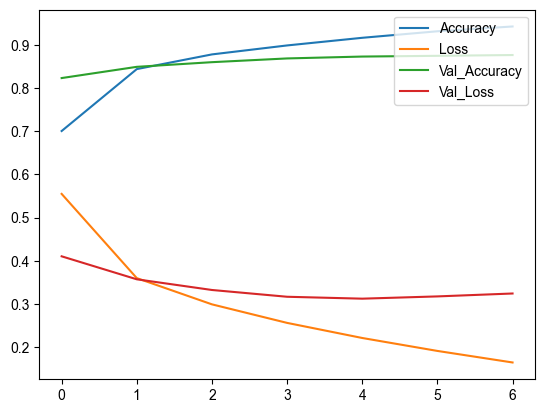

In [88]:
model_9 = gru_(vocab_size = all_words, embedding_dim = embedding_dim, max_length=max_length, units = 64, embeddings_matrix= word_vector)
model_compile(model=model_9)
history = model_fit(model=model_9, X_train=encoded_X_train, y_train=y_train, X_test= encoded_X_test, y_test=y_test, epochs=20, batch_size=32)
plot_changes(histoty=history)

# Model Inference

**1-Naive Bayes**

In [89]:
machine_learning_inference(model=model_1,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**2-Logistic Regression**

In [90]:
machine_learning_inference(model=model_2,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**3-Decision Tree**

In [91]:
machine_learning_inference(model=model_3,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Negative

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**4-K Nearest Neighbors**

In [92]:
machine_learning_inference(model=model_4,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**5-Random Forest**

In [93]:
machine_learning_inference(model=model_5,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**6-SGD Classifier**

In [94]:
machine_learning_inference(model=model_6,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**7-LSTM**

In [95]:
deep_learning_inference(model = model_7, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**8-Bidirectional LSTM**

In [96]:
deep_learning_inference(model = model_8, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**9-GRU**

In [97]:
deep_learning_inference(model = model_9, text = reviews, max_length = max_length, word_index = words_to_index)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

# Transformers

In [99]:
sentiment_analysis_transformers(reviews)

Device set to use mps:0


Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye